In [ ]:
!nvidia-smi

Mon Mar  4 15:41:07 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

/content
100% 6.23M/6.23M [00:00<00:00, 263MB/s]
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

100% 104k/104k [00:00<00:00, 93.3MB/s]
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 184.0ms
Speed: 16.4ms preprocess, 184.0ms inference, 767.2ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


/content


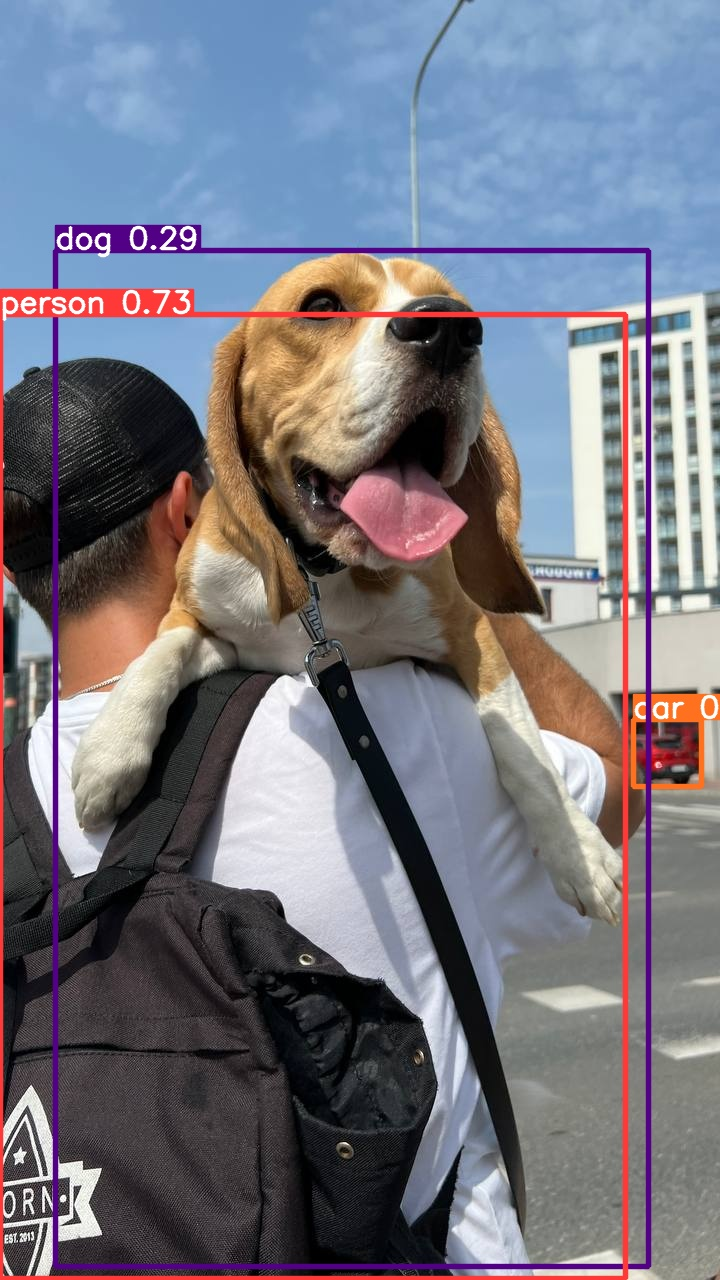

In [ ]:
%cd {HOME}
Image(filename='runs/detect/predict/dog.jpeg', height=600)

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="CayevCCqUemRoJBEdh5P")
project = rf.workspace("vv-loxkl").project("traffic-u0cfy")
version = project.version(1)
dataset = version.download("yolov7")


loading Roboflow workspace...
loading Roboflow project...


In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=50 imgsz=800 plots=True

/content
New https://pypi.org/project/ultralytics/8.1.23 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/traffic-1/data.yaml, epochs=50, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment

In [ ]:
!ls {HOME}/runs/detect/train2/

args.yaml					    R_curve.png		 val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		 val_batch0_pred.jpg
confusion_matrix.png				    results.png		 val_batch1_labels.jpg
events.out.tfevents.1709567232.682720a65b76.3034.0  train_batch0.jpg	 val_batch1_pred.jpg
F1_curve.png					    train_batch1.jpg	 val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch2040.jpg  val_batch2_pred.jpg
labels.jpg					    train_batch2041.jpg  weights
P_curve.png					    train_batch2042.jpg
PR_curve.png					    train_batch2.jpg


/content


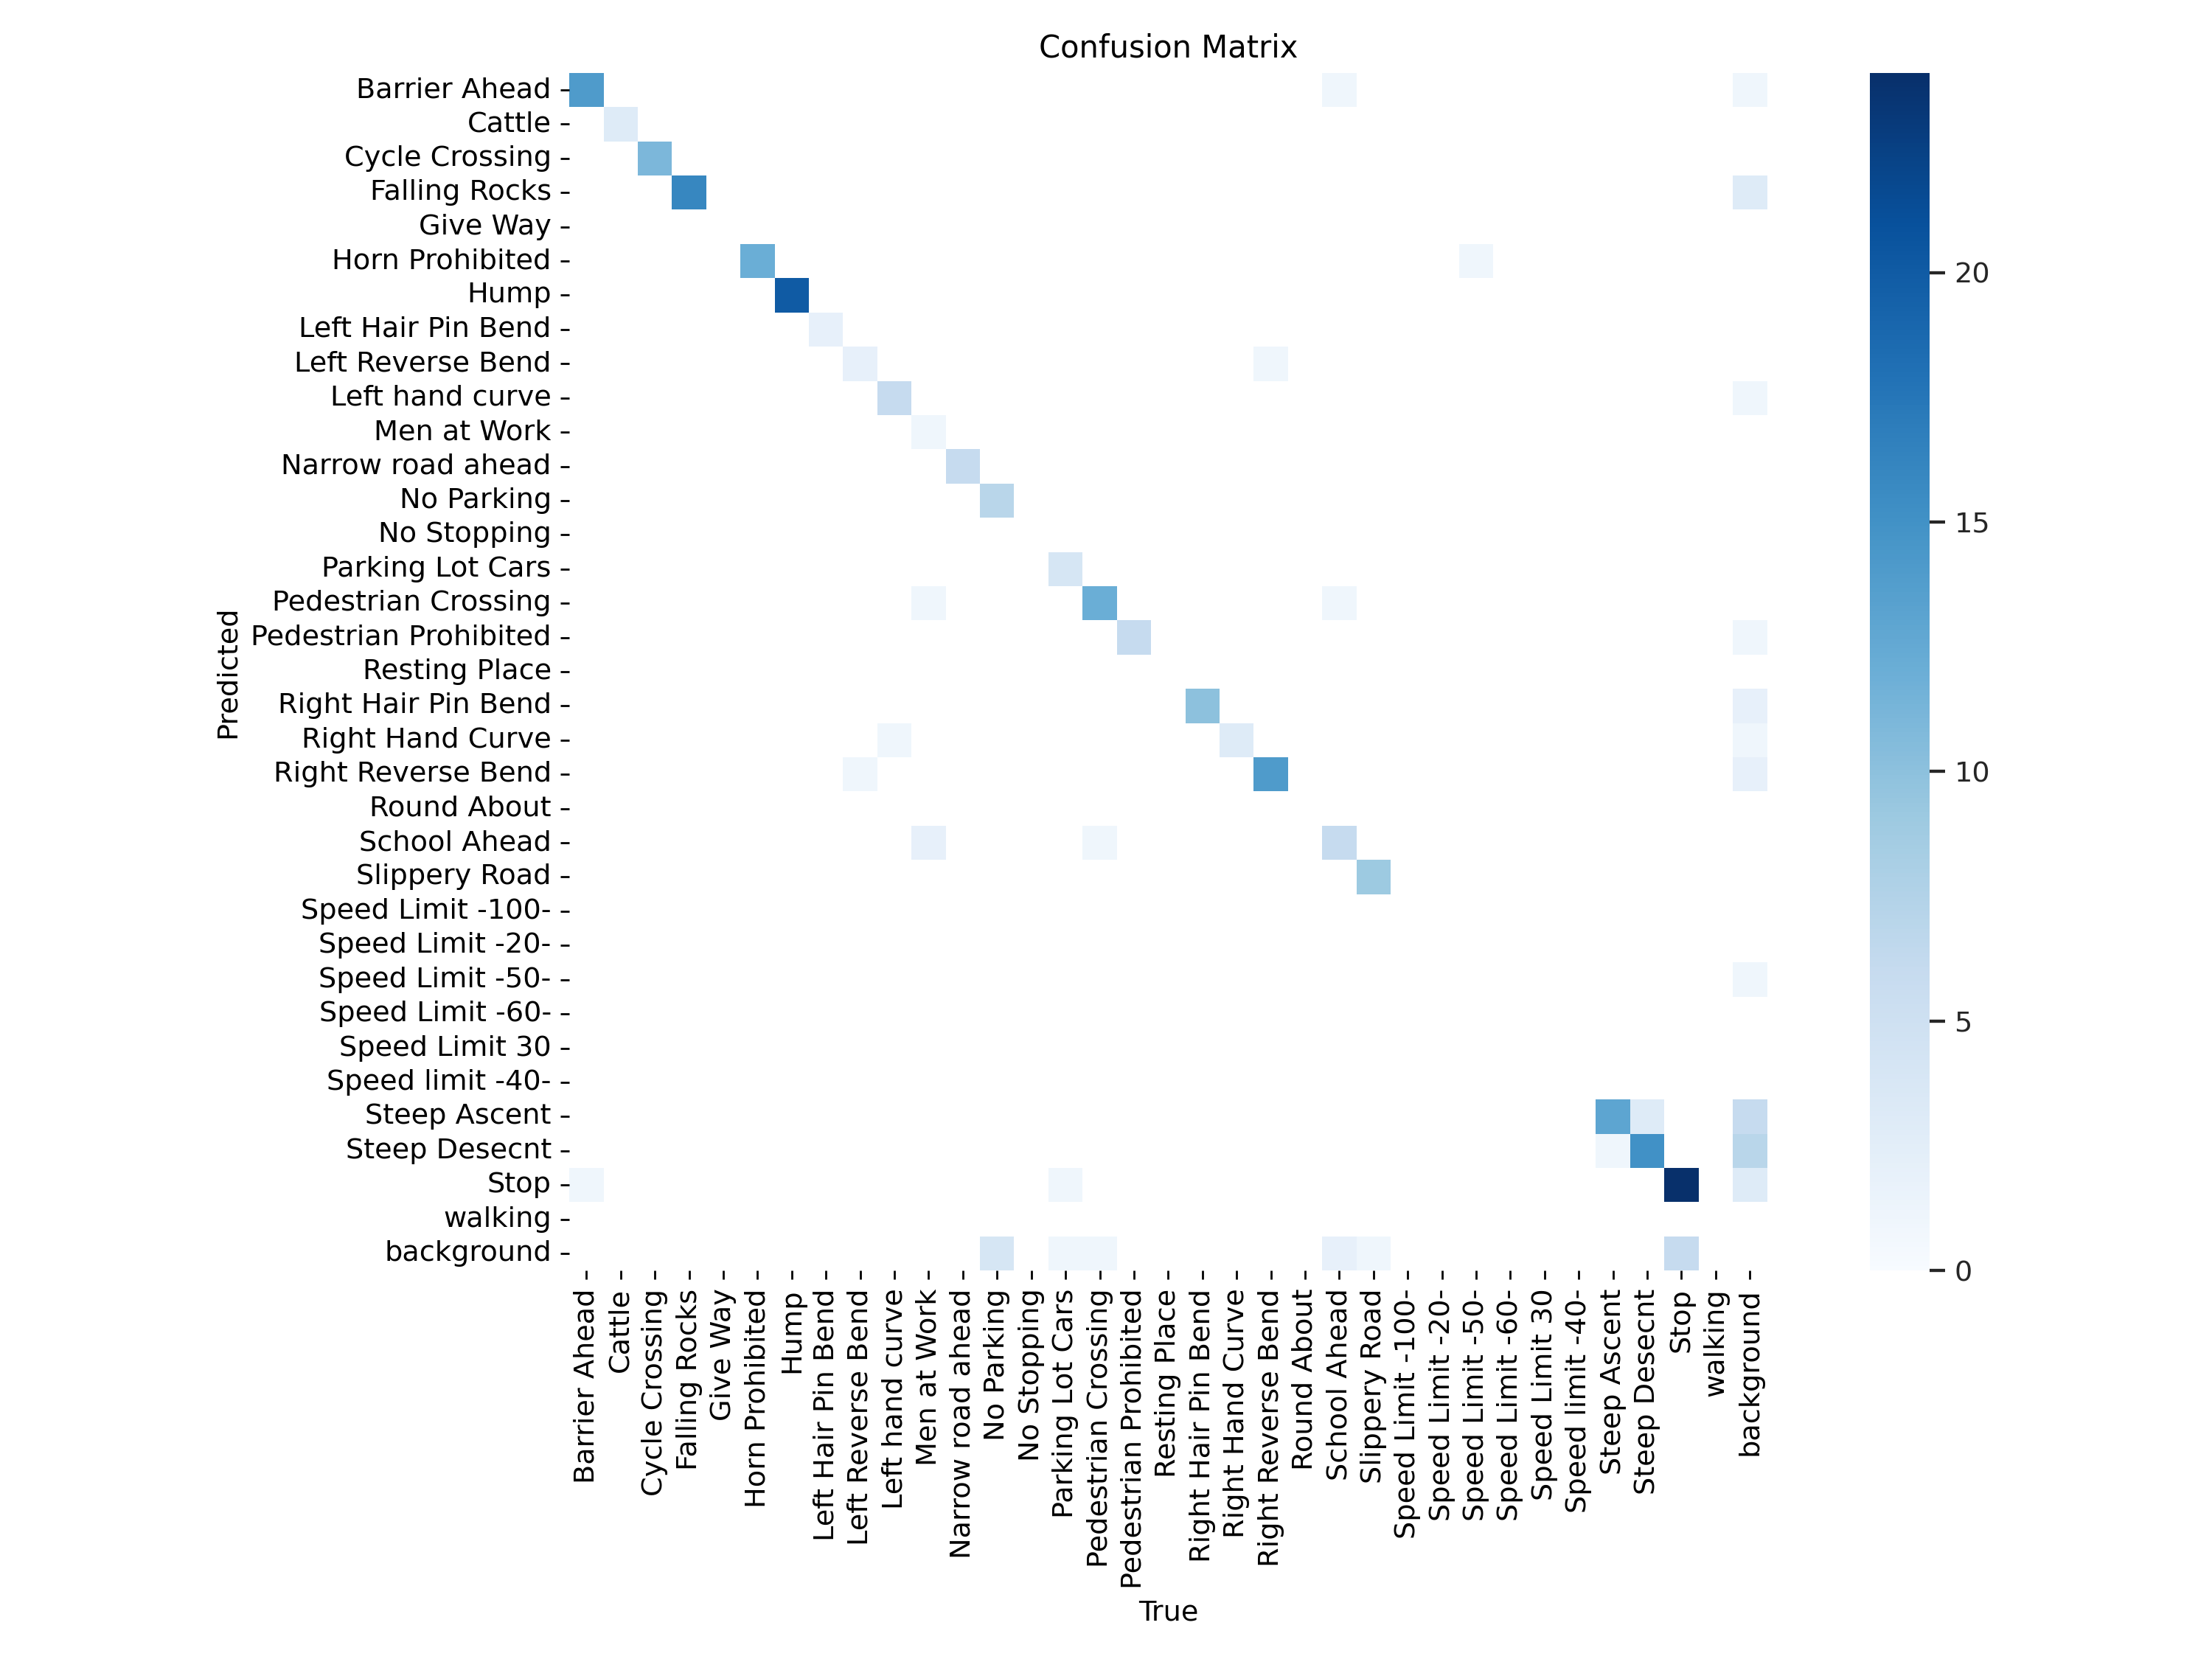

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/confusion_matrix.png', width=600)

/content


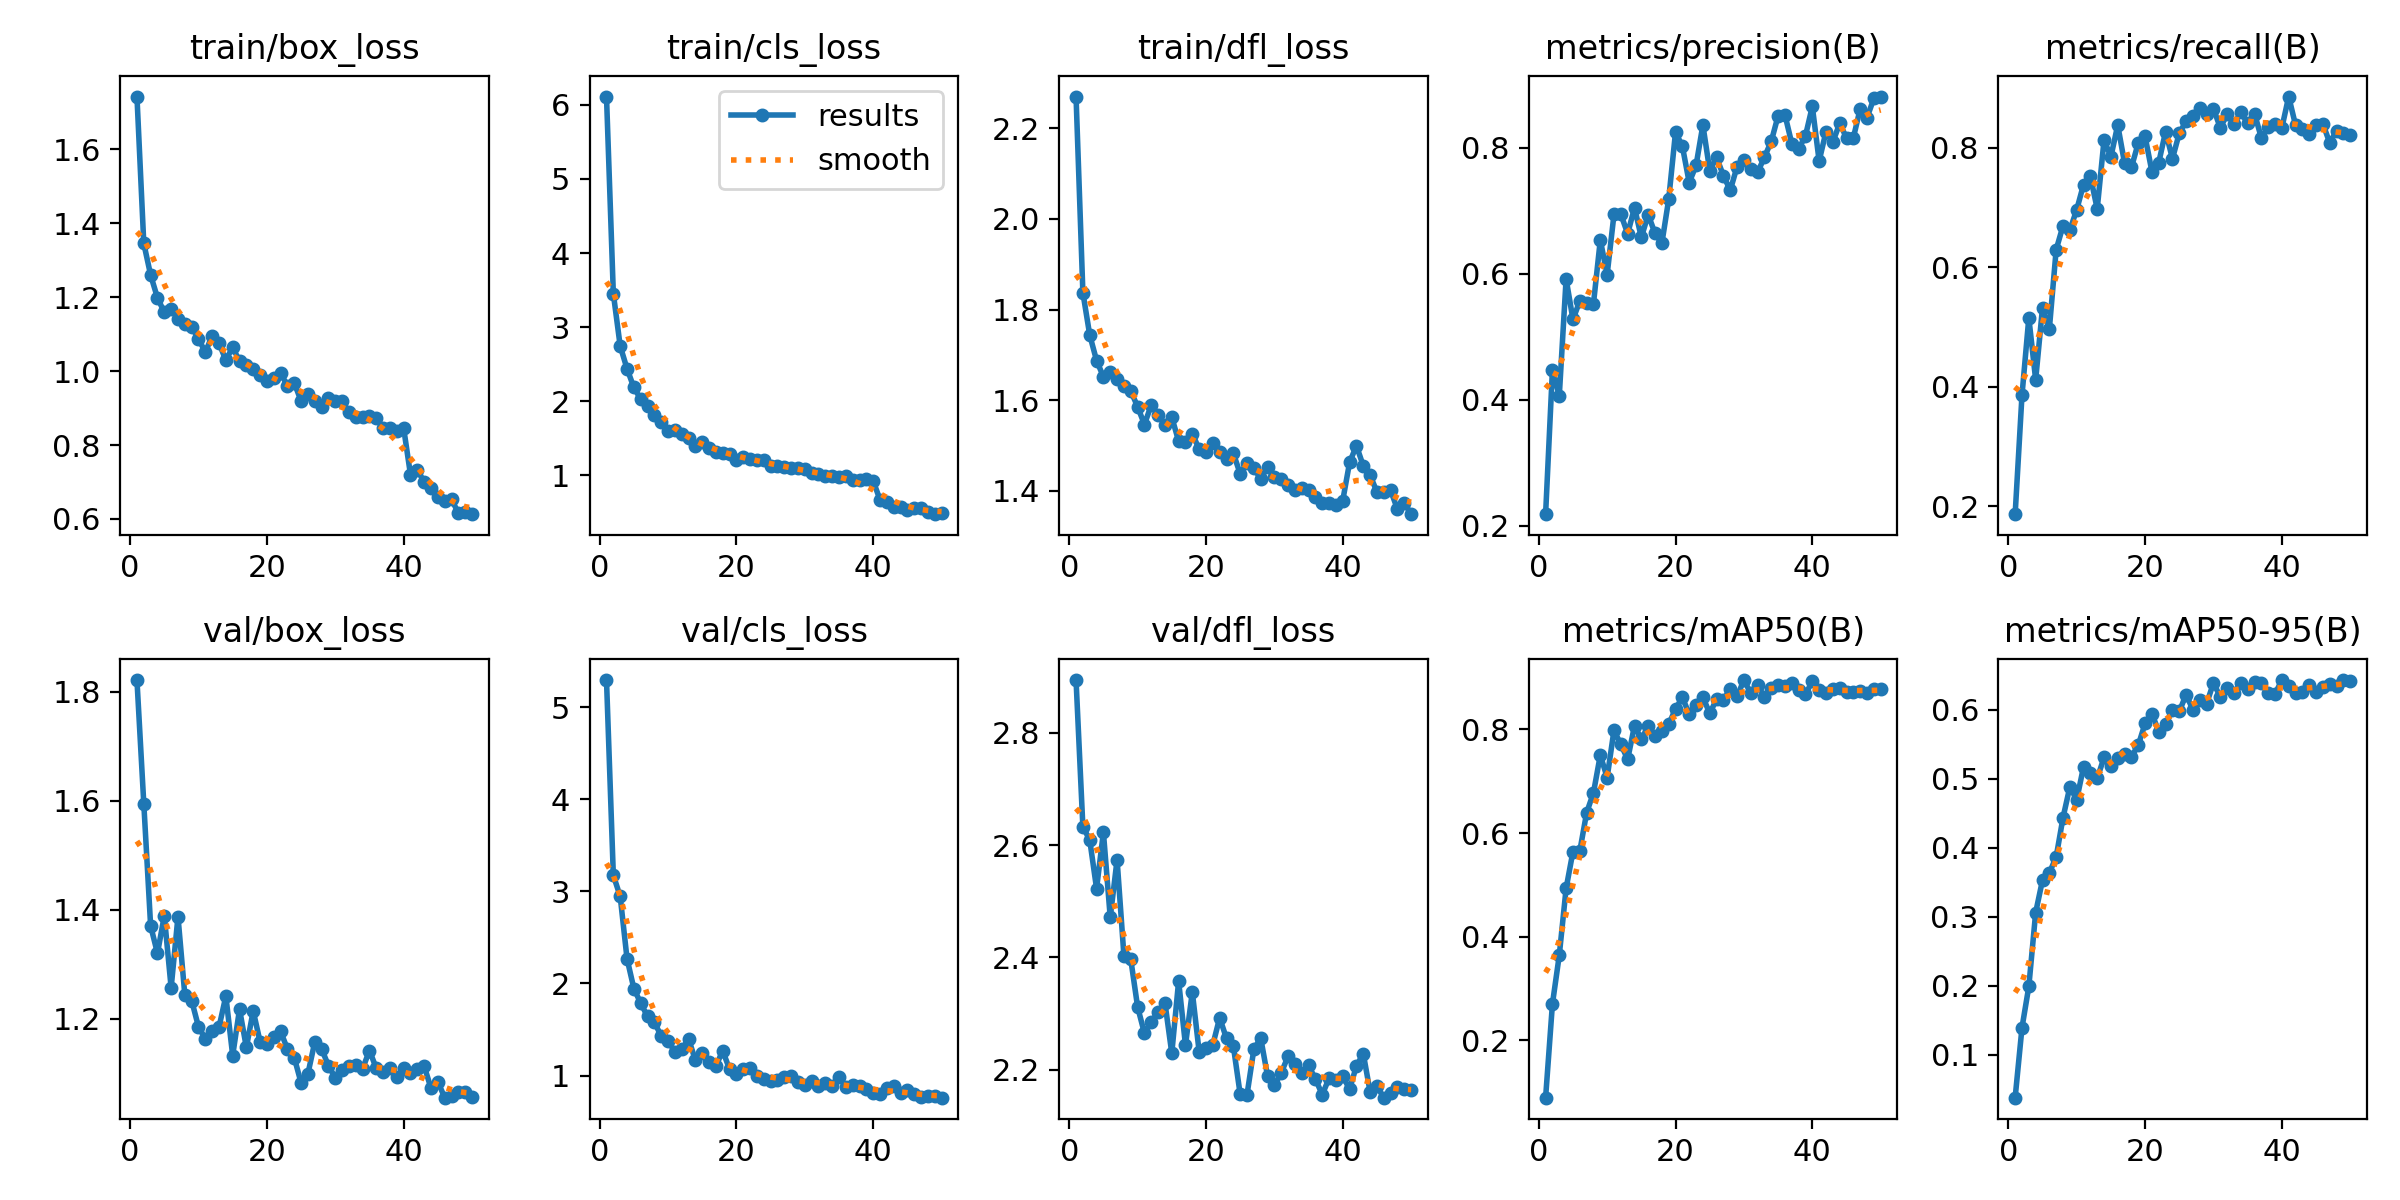

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/results.png', width=600)

/content


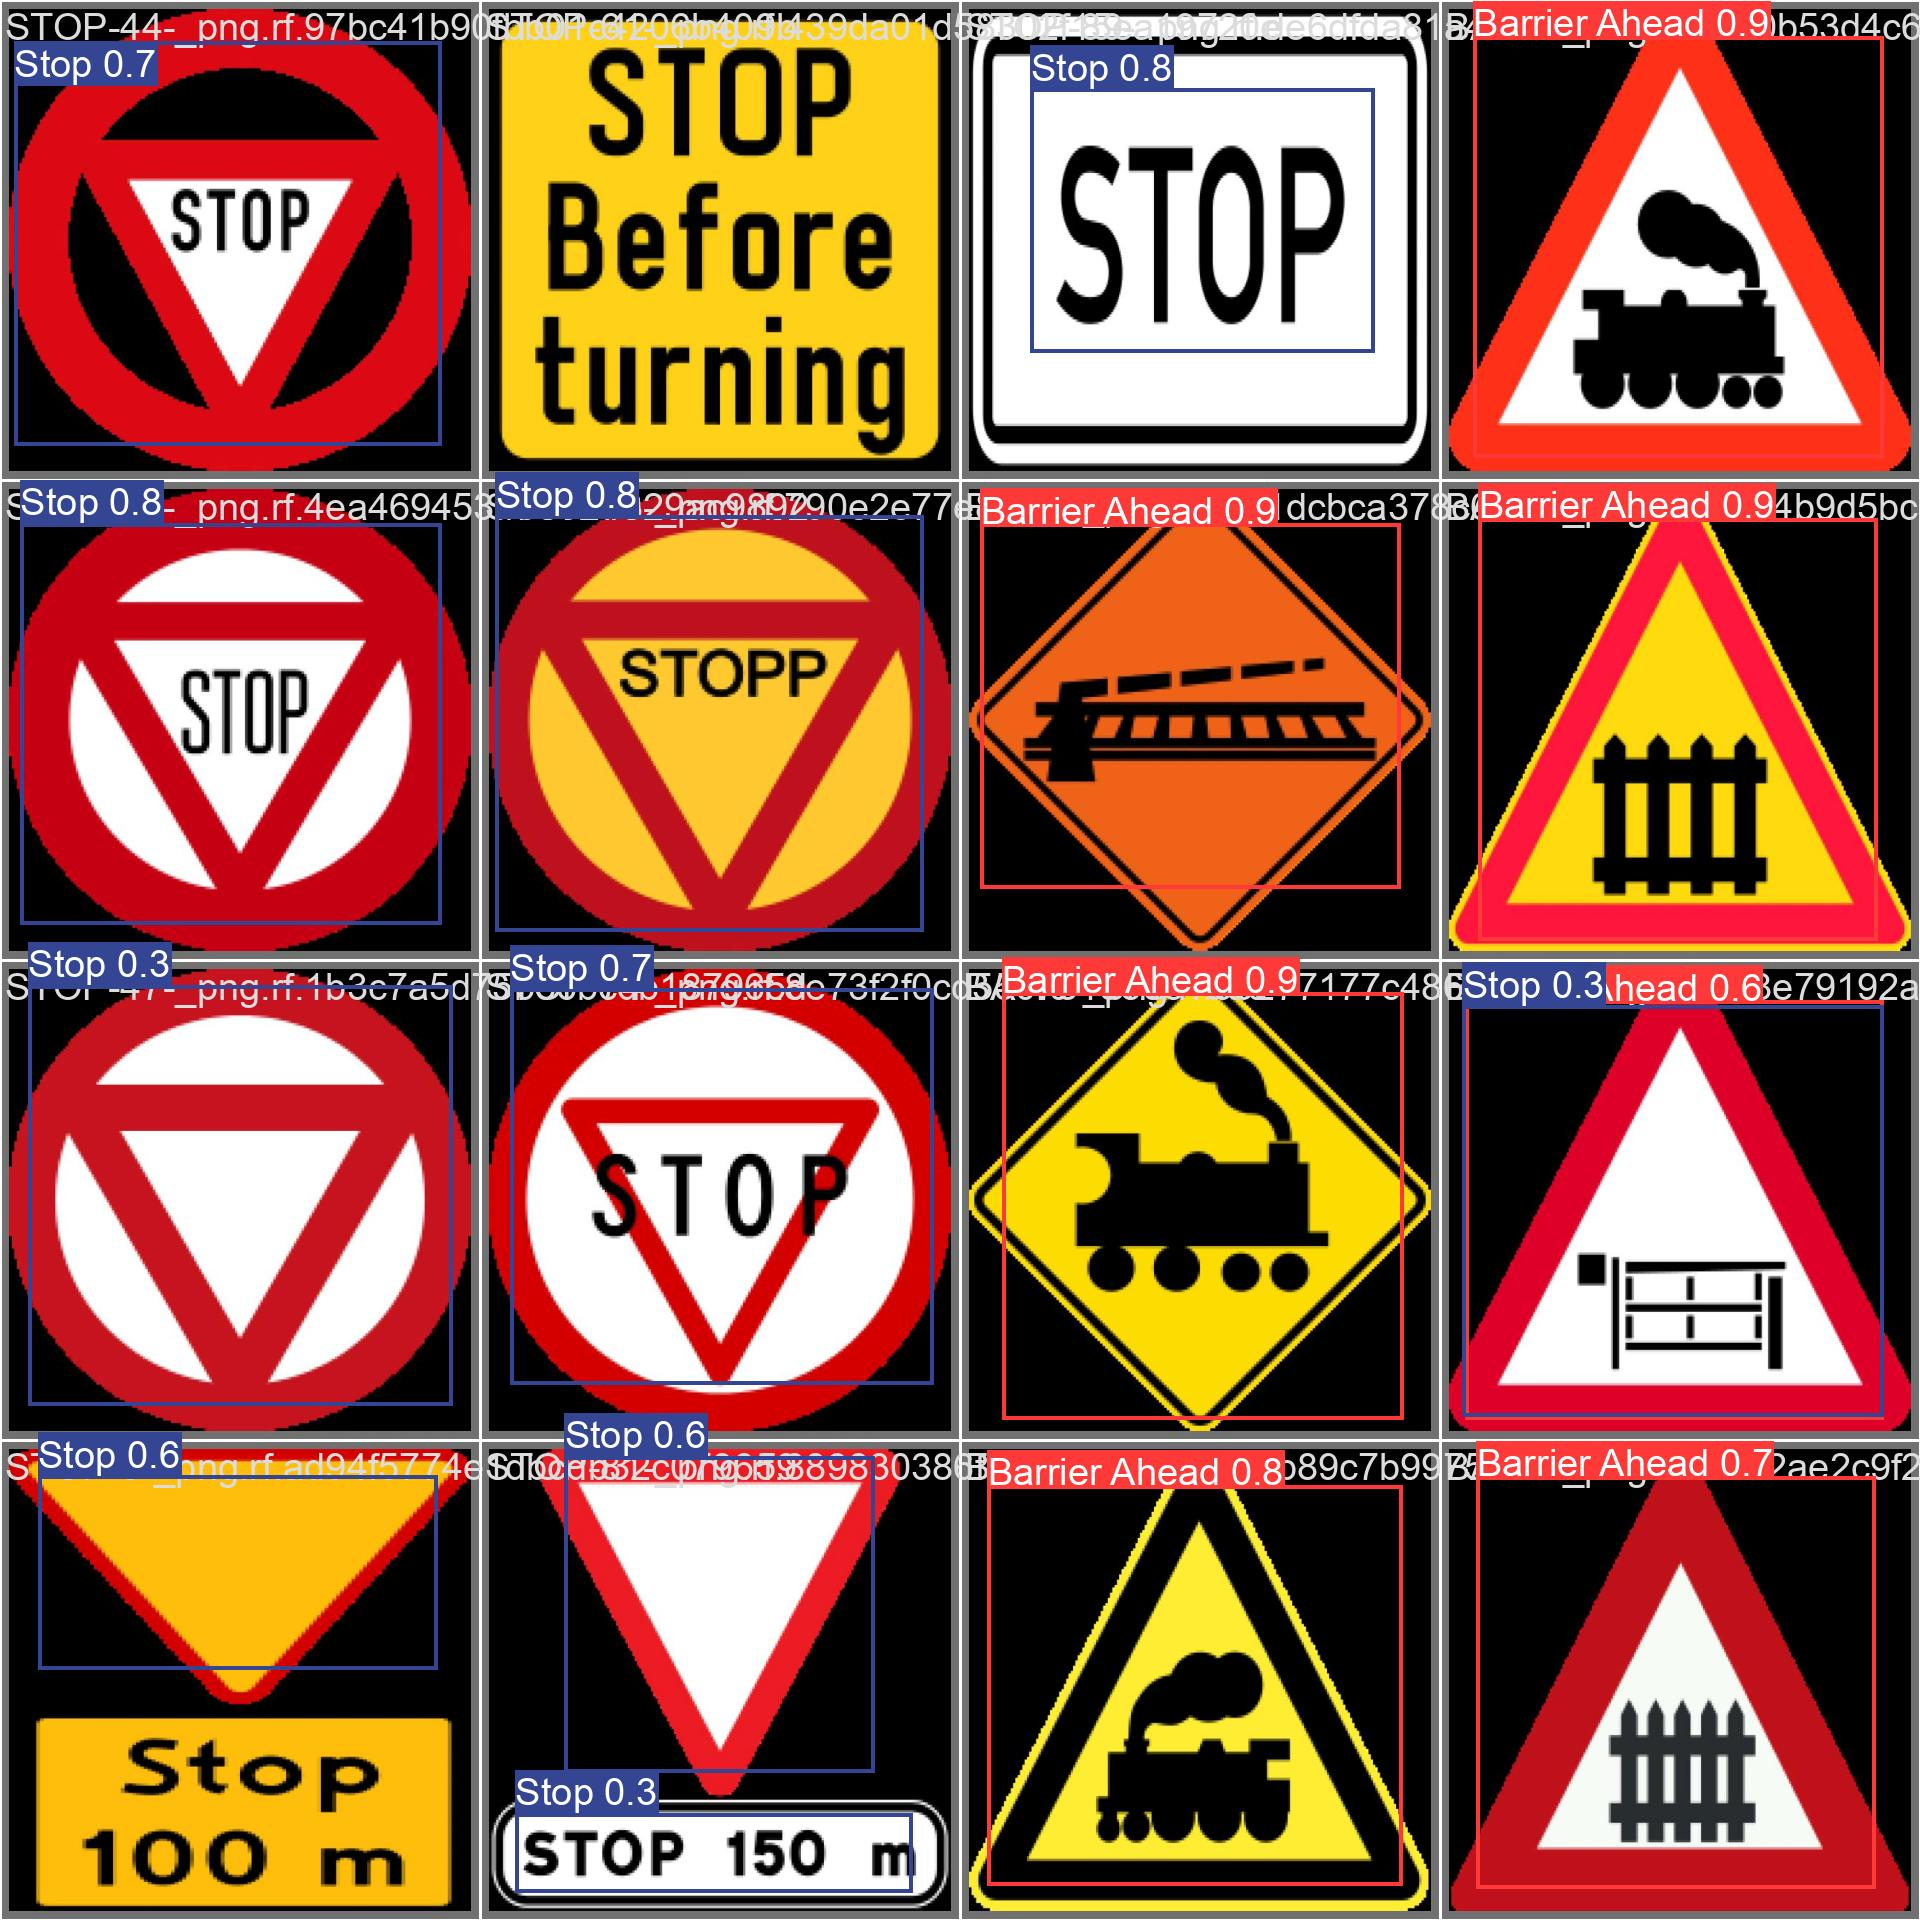

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/val_batch0_pred.jpg', width=600)

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train2/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11138742 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/traffic-1/valid/labels.cache... 243 images, 0 backgrounds, 0 corrupt: 100% 243/243 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 16/16 [00:08<00:00,  1.86it/s]
                   all        243        247      0.866      0.833      0.893      0.642
         Barrier Ahead        243         15      0.975          1      0.995      0.807
                Cattle        243          3          1      0.985      0.995      0.813
        Cycle Crossing        243         11      0.956          1      0.995      0.785
         Falling Rocks        243         16      0.922          1      0.988      0.564
       Horn Prohibited        243         12       0.92      0.954      0.989      0.685
                  Hump        243      

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train2/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11138742 parameters, 0 gradients, 28.5 GFLOPs

image 1/257 /content/traffic-1/test/images/BA-10-_jpg.rf.3f6a8752c655831e30820b3f39bae4f2.jpg: 800x800 1 Barrier Ahead, 22.7ms
image 2/257 /content/traffic-1/test/images/BA-11-_png.rf.18b1a6722554da3c6238fcdbbeef8dbb.jpg: 800x800 1 Barrier Ahead, 22.6ms
image 3/257 /content/traffic-1/test/images/BA-12-_jpg.rf.4eab4bd35ed3ab3ddd7716b102a819ae.jpg: 800x800 1 Barrier Ahead, 22.5ms
image 4/257 /content/traffic-1/test/images/BA-13-_png.rf.13aad51f6acce0c244212b9e3a7fa026.jpg: 800x800 1 Barrier Ahead, 22.6ms
image 5/257 /content/traffic-1/test/images/BA-16-_png.rf.8ffe10cddd33b600e4d7c16af57942c5.jpg: 800x800 1 Barrier Ahead, 22.6ms
image 6/257 /content/traffic-1/test/images/BA-20-_png.rf.b4378d7b63bd117cd880631aaa9d0767.jpg: 800x800 1 Barrier Ahead, 22.5ms
image 7/257 /content/traffic-1/test/images/BA-22-_png.rf.c9

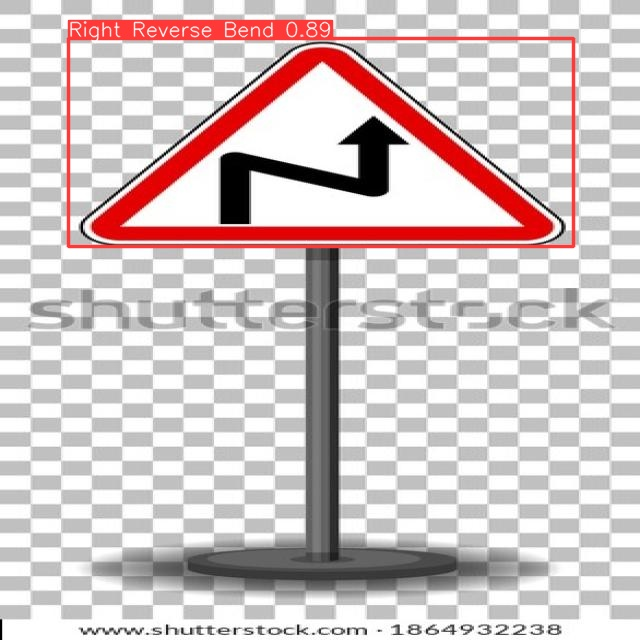

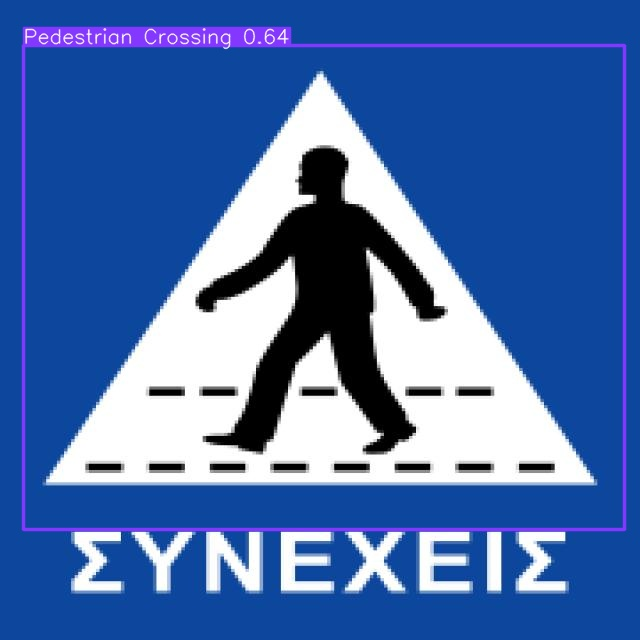

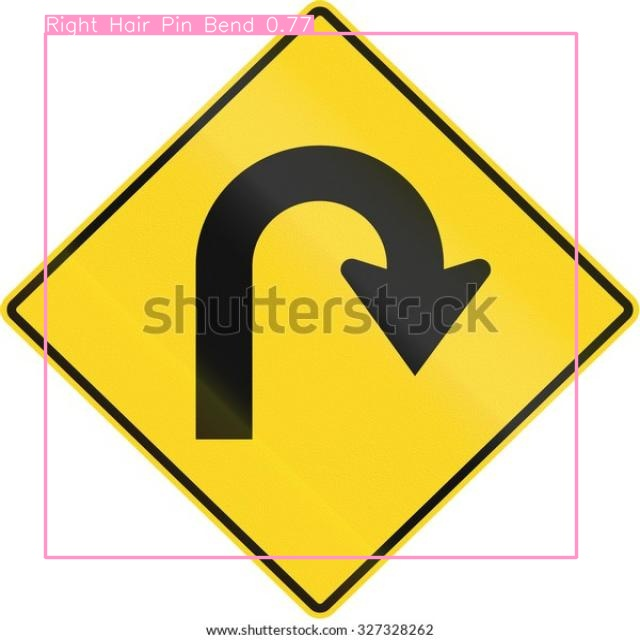

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict2/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [ ]:
import zipfile

def create_zip(folder_path, zip_name):
  """Creates a ZIP archive of the specified folder.

  Args:
      folder_path: The path to the folder to be zipped.
      zip_name: The desired name for the ZIP archive.
  """

  with zipfile.ZipFile(zip_name, 'w', zipfile.ZIP_DEFLATED) as zip_file:
    for root, _, files in os.walk(folder_path):
      for file in files:
        file_path = os.path.join(root, file)
        zip_file.write(file_path, os.path.relpath(file_path, os.path.join(folder_path, '..')))

# Replace with the actual path to your folder
folder_path = '/content/runs'

# Choose a desired name for the ZIP archive
zip_name = 'yolov8_road sign detection.zip'

create_zip(folder_path, zip_name)

# Download the created ZIP archive to your local machine
from google.colab import files
files.download(zip_name)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>